In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import cauchy, norm

In [31]:
def cauchy(x, x0, gamma):
    val = (1/(math.pi*gamma))*(gamma*gamma/((x-x0)**2+gamma*gamma))
    val2 = 1/(math.pi*(x*x+1))
    return val

### Check normal numbers are in fact gaussian

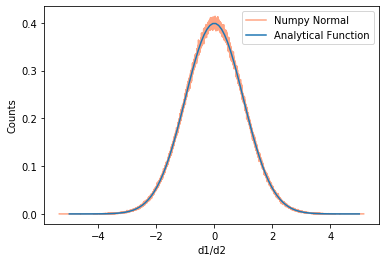

In [27]:
mu      = 0
sigmas  = [1]
l       = 10000000
ran     = (-5,5)
bins    = 10000
binsize = (ran[1]-ran[0])/bins

plt.figure()
plt.xlabel("d1/d2")
plt.ylabel("Counts")
    
rand_test = np.random.normal(mu, sigmas[0], l)
test = np.histogram(rand_test, bins=bins, density=True)
plt.plot(test[1][0:bins], test[0], label="Numpy Normal", color="coral", alpha=0.7)

xtest = np.linspace(ran[0], ran[1], 100)
plt.plot(xtest,norm.pdf(xtest, mu, sigmas[0]), label="Analytical Function")
plt.legend();

### The ratio between to standard normal distributed numbers is a Cauchy Distribution

Ref: http://www.math.wm.edu/~leemis/chart/UDR/PDFs/StandardnormalStandardcauchy.pdf

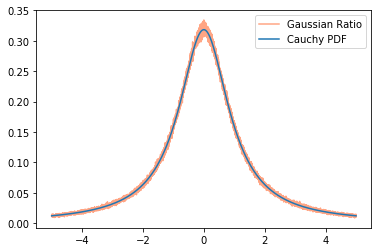

In [36]:
mu      = 0
sigmas  = [1]
l       = 10000000
ran     = (-5,5)
bins    = 10000
binsize = (ran[1]-ran[0])/bins


d1 = np.random.normal(mu, sigmas[0], l)
d2 = np.random.normal(mu, sigmas[0], l)
dd  = []
for i in range(l):
    dd.append(d1[i]/d2[i])
    
dhist = np.histogram(dd,bins=bins,range=ran)
plt.plot(dhist[1][0:bins], dhist[0]/(binsize*l), color="coral", alpha=0.7, label="Gaussian Ratio")

x = np.linspace(ran[0],ran[1], 1000)
plt.plot(x, cauchy(x, x0=0, gamma=1.0), label="Cauchy PDF")  
plt.legend();

### Case from the JC

Distributions are the same with gaussian mean 0 :

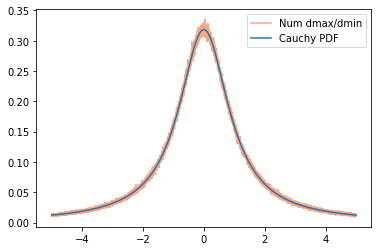

In [67]:
mu      = 0
sigmas  = [1]
l       = 10000000
ran     = (-5,+5)
bins    = 10000
binsize = (ran[1]-ran[0])/bins

d1 = np.random.normal(mu, sigmas[0], l)
d2 = np.random.normal(mu, sigmas[0], l)
dd  = []
for i in range(l):
    if d1[i] > d2[i]:
        dd.append(d1[i]/d2[i])
    else:
        dd.append(d2[i]/d1[i])
    
dhist = np.histogram(dd,bins=bins,range=ran)
plt.plot(dhist[1][0:bins], dhist[0]/(binsize*l), color="coral", alpha=0.7, label="Num dmax/dmin")

x = np.linspace(ran[0],ran[1], 1000)
plt.plot(x, cauchy(x, x0=0, gamma=1.0), label="Cauchy PDF")  
plt.legend();

So both probability distribution functions are the same. Without plotting PDF's and recreating the plot from the paper:

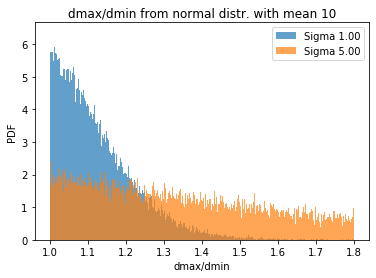

In [66]:
mu      = 10
sigmas  = [1,5]
l       = 1000000
bins    = 10000
ran     = (1,1.8)

for sigma in sigmas:
    d1 = np.random.normal(mu, sigma, l)
    d2 = np.random.normal(mu, sigma, l)
    dd  = []
    for i in range(l):
        if d1[i] > d2[i]:
            dd.append(d1[i]/d2[i])
        else:
            dd.append(d2[i]/d1[i])
    plt.hist(dd, alpha=0.7, label=f"Sigma {sigma:.2f}", density=True, range=ran, bins=bins)
plt.xlabel("dmax/dmin")
plt.ylabel("PDF")
plt.title("dmax/dmin from normal distr. with mean 10")
plt.legend();